In [1]:
import glob
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
plt.rcParams.update({'font.size': 20})
sns.set_style("darkgrid")

# Baseline Experiment of Full Algorithm

In [3]:
exp_data = None

with open("./experiments/baseline/exp_200403-235142404987.json") as f:
    exp_data = json.load(f)

## Best vs. Random Search vs. Random L2-Sum Error

In [4]:
data = []

for run in range(20):
    data.append({
        "best_l2": exp_data["best_l2s"][run],
        "rand_search_l2": exp_data["rs_l2s"][run],
        "rand_l2": exp_data["rand_l2s"][run],
    })
    
data = pd.DataFrame(data)

In [5]:
# P Value of Best L2-Sum vs. Random Search L2-Sum
s, p = scipy.stats.wilcoxon(data["best_l2"], data["rand_search_l2"], alternative="less")
print(f"Best vs. Random Search p-value: {p:.4} (4 s.f.)")

# P Value of Best L2-Sum vs. Random L2-Sum
s, p = scipy.stats.wilcoxon(data["best_l2"], data["rand_l2"], alternative="less")
print(f"Best vs Random p-value: {p:.4} (4 s.f.)")

Best vs. Random Search p-value: 0.0007536 (4 s.f.)
Best vs Random p-value: 4.429e-05 (4 s.f.)


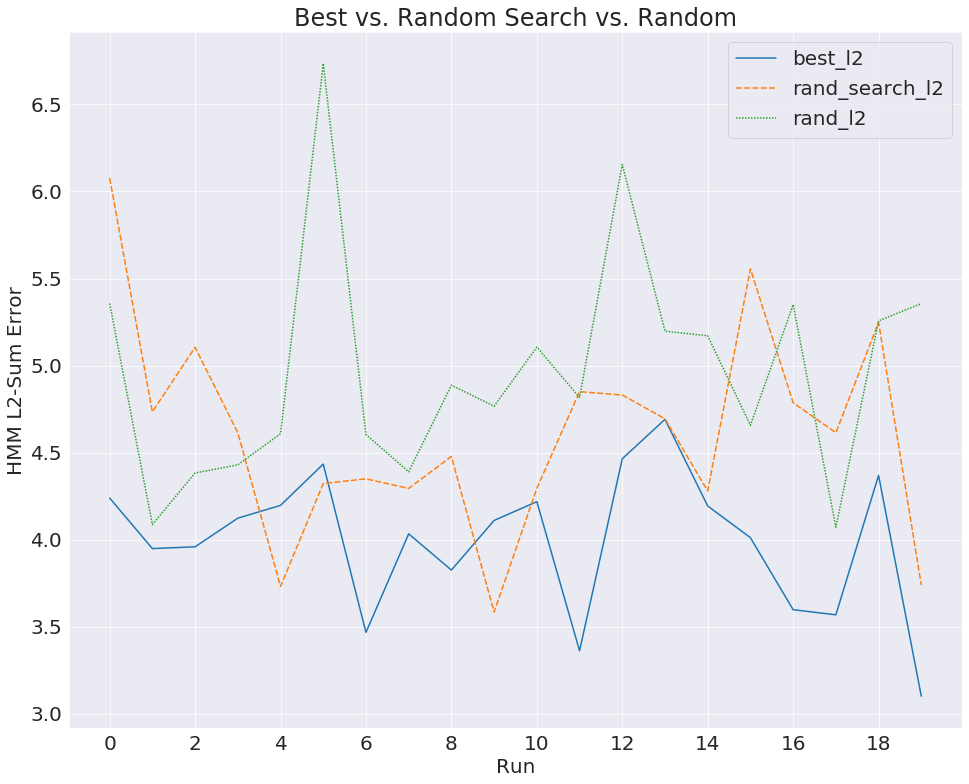

In [6]:
plt.figure(figsize=(16, 12.8))
ax = sns.lineplot(data=data)
_ = ax.set(
    title="Best vs. Random Search vs. Random",
    xlabel="Run",
    xticks=list(range(0, 20, 2)),
    ylabel="HMM L2-Sum Error"
)

## Mean Fitness of EA Population by Generation

In [7]:
data = []

for run in range(20):
    for gen in range(50):
        data.append({
            "run": run,
            "gen": gen,
            "mean_fitness": exp_data["mean_fitnesses"][run][gen],
        })
    
data = pd.DataFrame(data)

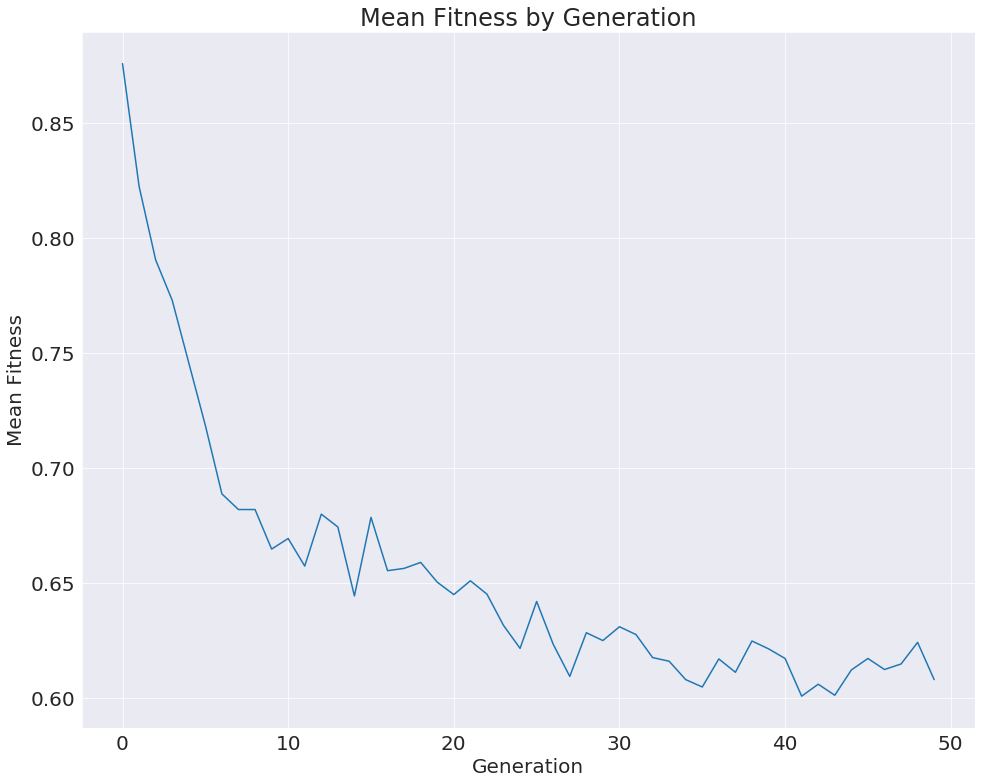

In [8]:
plt.figure(figsize=(16, 12.8))
ax = sns.lineplot(
    x="gen",
    y="mean_fitness",
    data=data[data["run"] == 1],
)
_ = ax.set(title="Mean Fitness by Generation", xlabel="Generation", ylabel="Mean Fitness")

# Uniform vs. Gaussian Mutation Experiment

# States and Symbols Scalability Experiment

In [9]:
exp_data = []

for fp in glob.glob("./experiments/states_symbols_2/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))
        
# Sort the experiment data by states and then symbols
exp_data = sorted(
    exp_data,
    key=lambda k: (k["params"]["states"], k["params"]["symbols"])
)

In [10]:
# Convert experiment data to format that can be plotted by Seaborn
data = []

for exp in exp_data:
    params = exp["params"]
    states, symbols = params["states"], params["symbols"]
    for run in range(20):
        data.append({ 
            "states": states,
            "symbols": symbols,
            "label": (states, symbols),
            "model": "best_l2",
            "run": run,
            "loss_scaled": exp["best_l2s"][run] / states,
        })
        data.append({ 
            "states": states,
            "symbols": symbols,
            "label": (states, symbols),
            "model": "rand_search_l2",
            "run": run,
            "loss_scaled": exp["rs_l2s"][run] / states,
        })
        data.append({ 
            "states": states,
            "symbols": symbols,
            "label": (states, symbols),
            "model": "rand_l2",
            "run": run,
            "loss_scaled": exp["rand_l2s"][run] / states,
        })
    
data = pd.DataFrame(data)

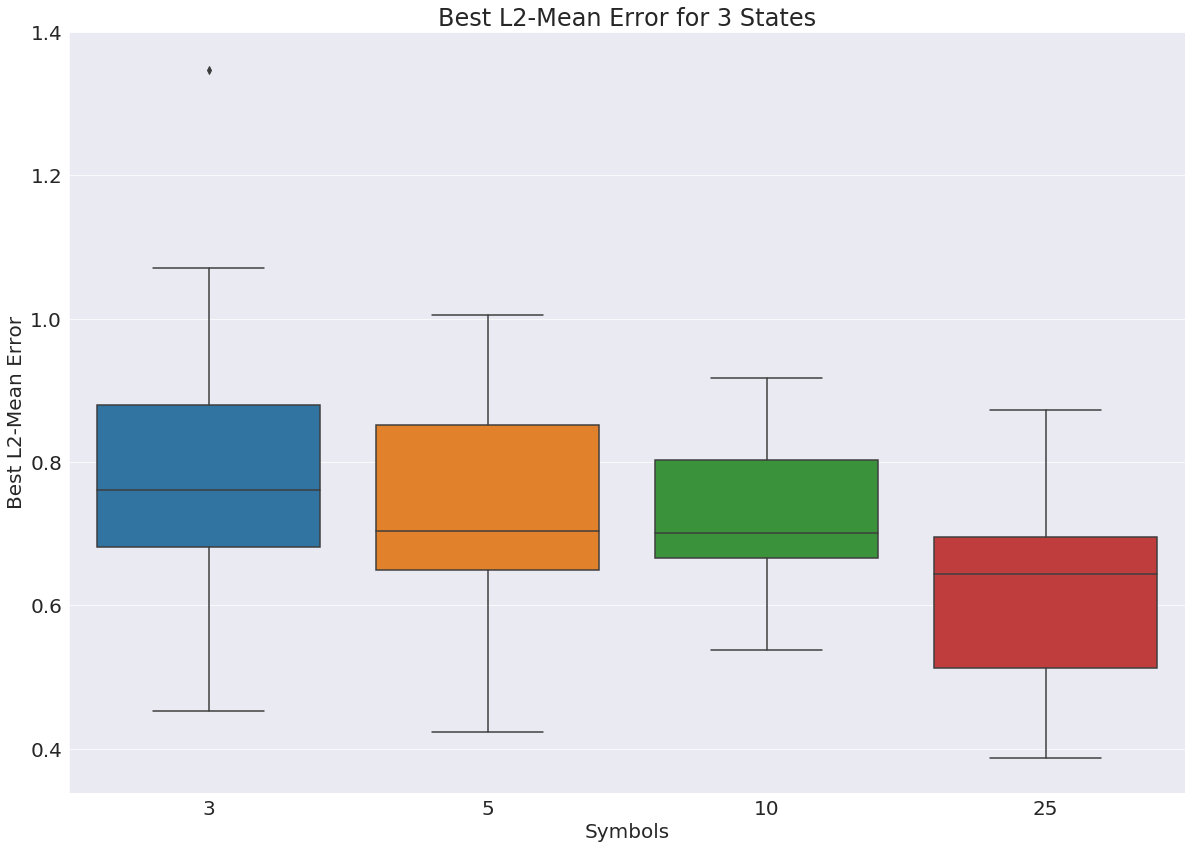

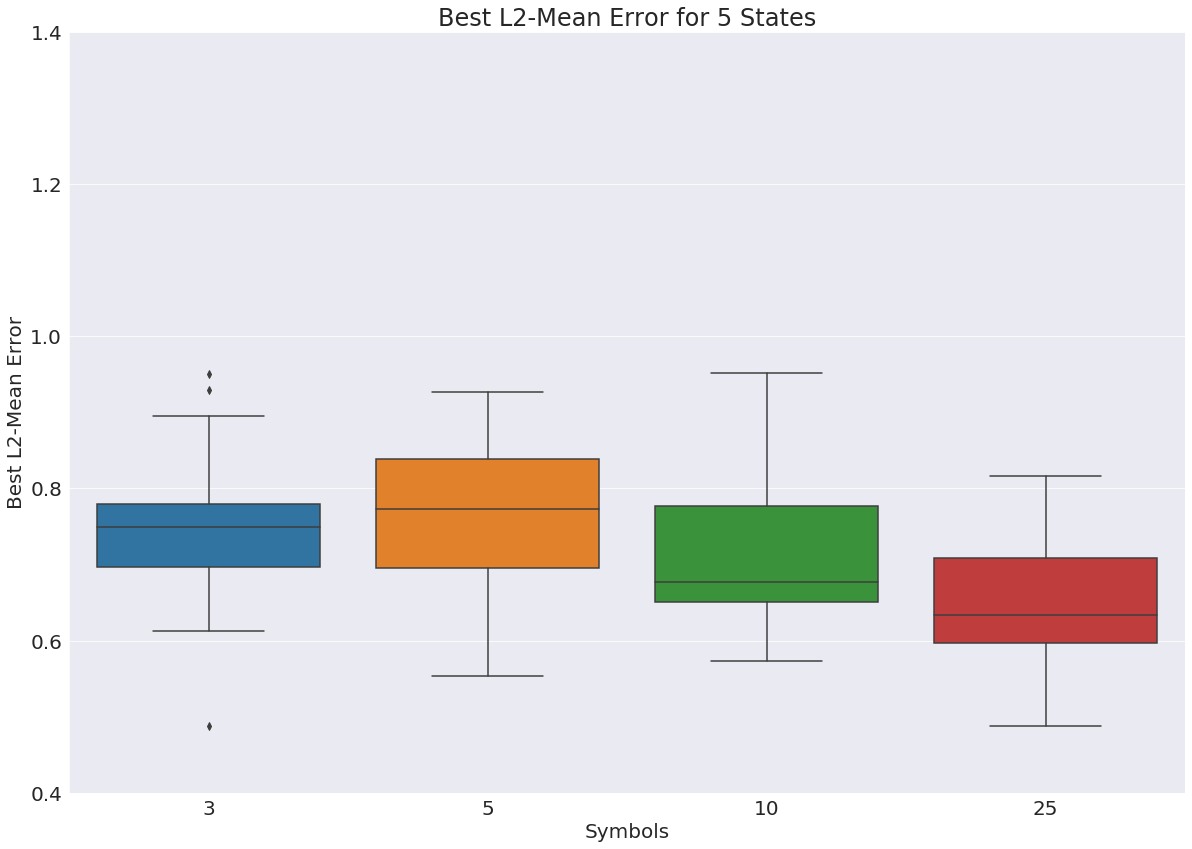

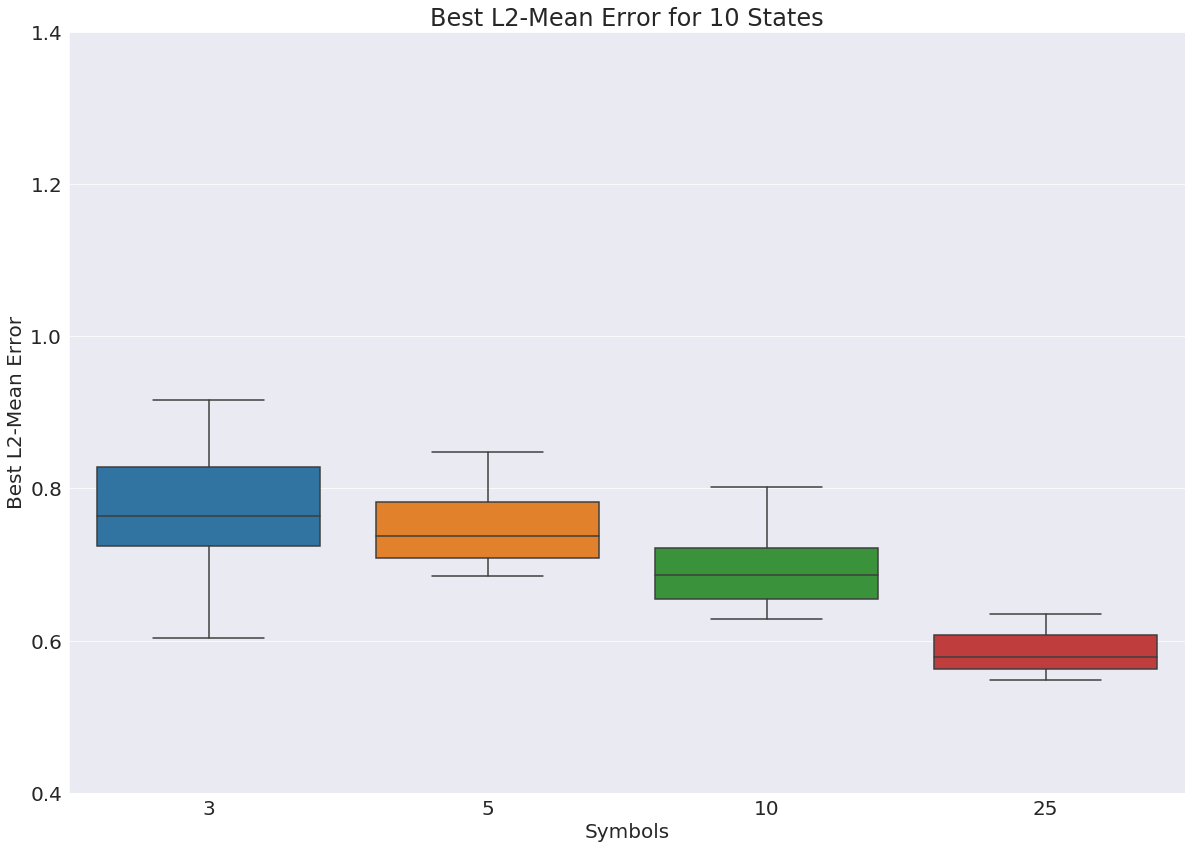

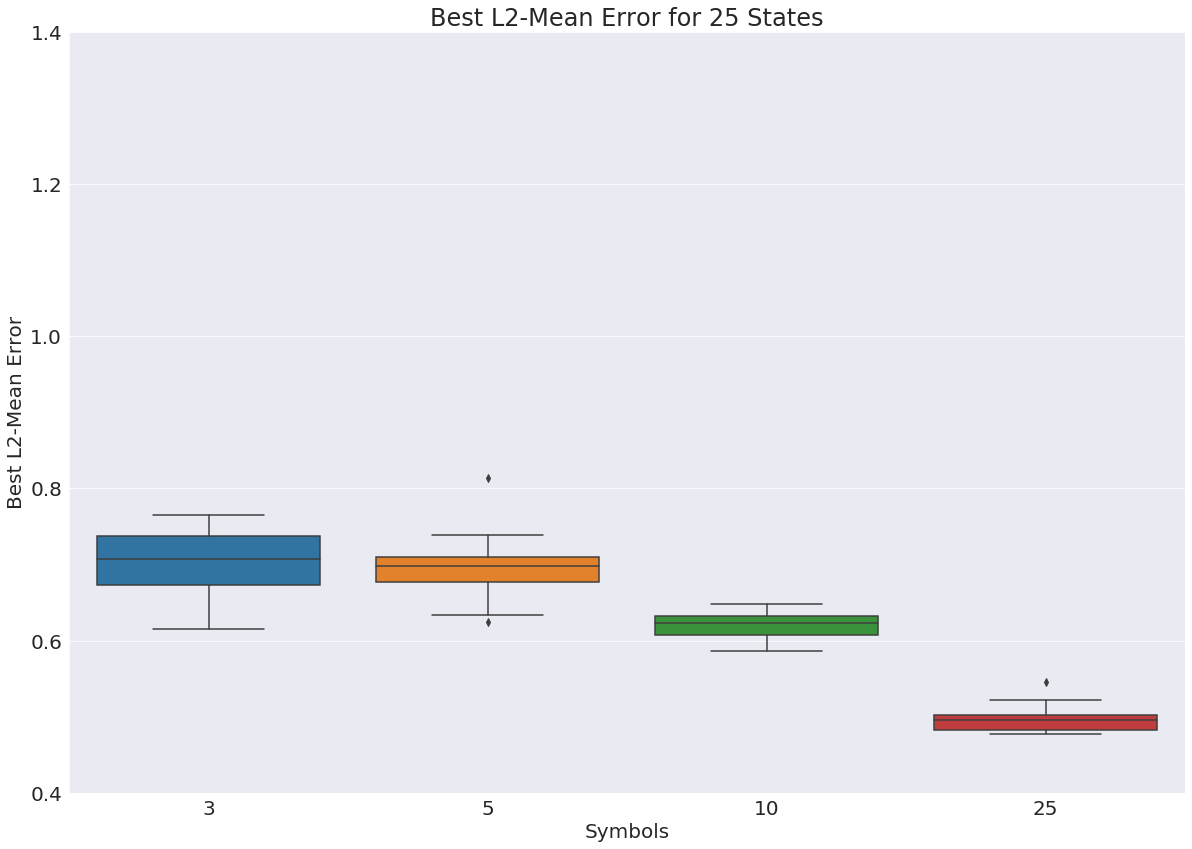

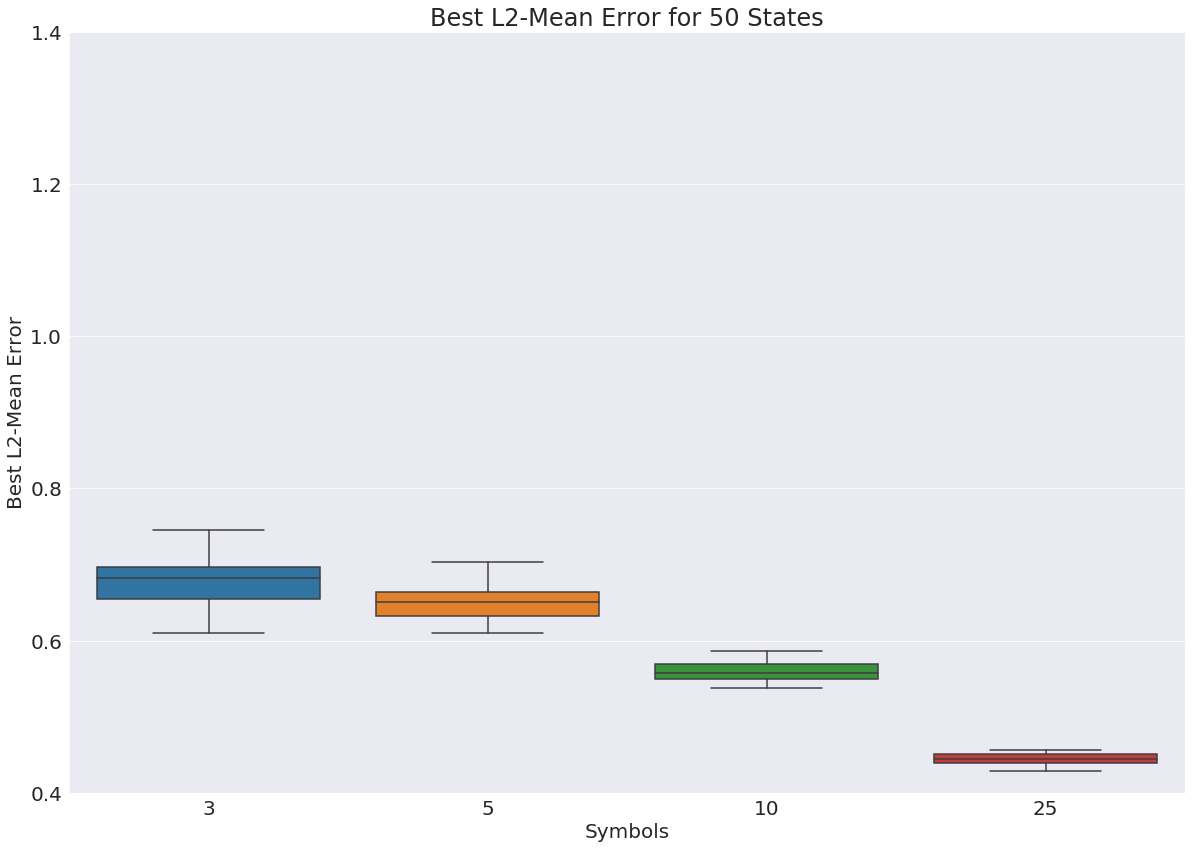

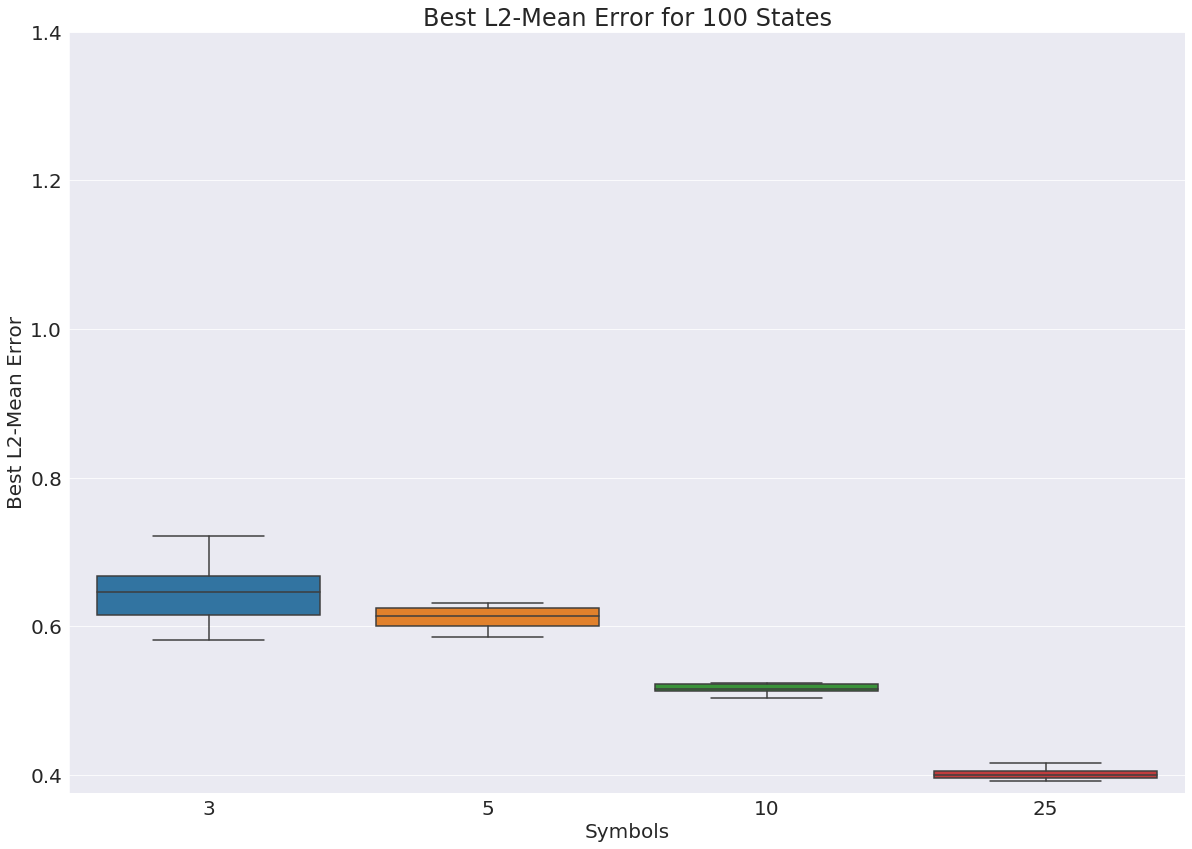

In [11]:
for states in [3, 5, 10, 25, 50, 100]:
    plt.figure(figsize=(20, 14))

    ax = sns.boxplot(
        x="symbols",
        y="loss_scaled",
        data=data[(data["model"] == "best_l2") & (data["states"] == states)],
    )
    _ = ax.set(
        title=f"Best L2-Mean Error for {states} States",
        xlabel="Symbols",
        ylabel="Best L2-Mean Error",
        yticks=np.arange(0.4, 1.5, 0.2),
    )

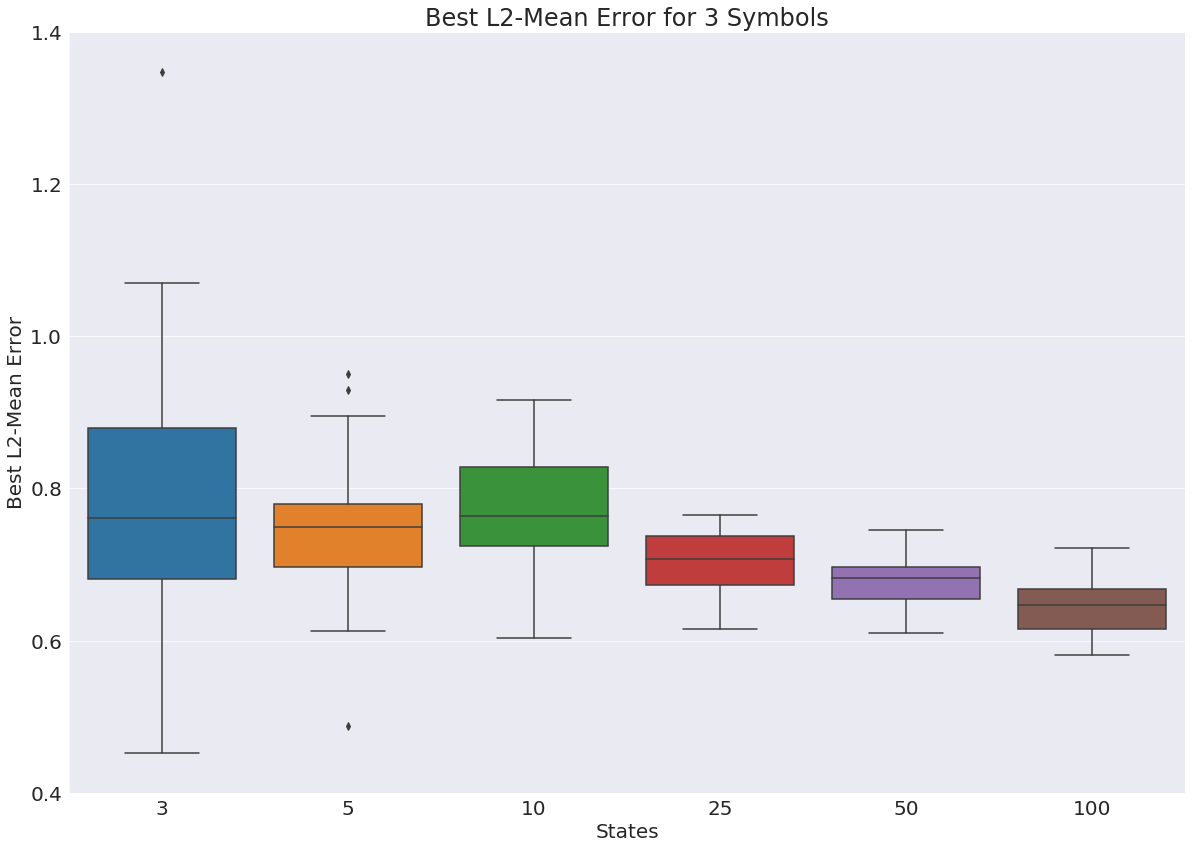

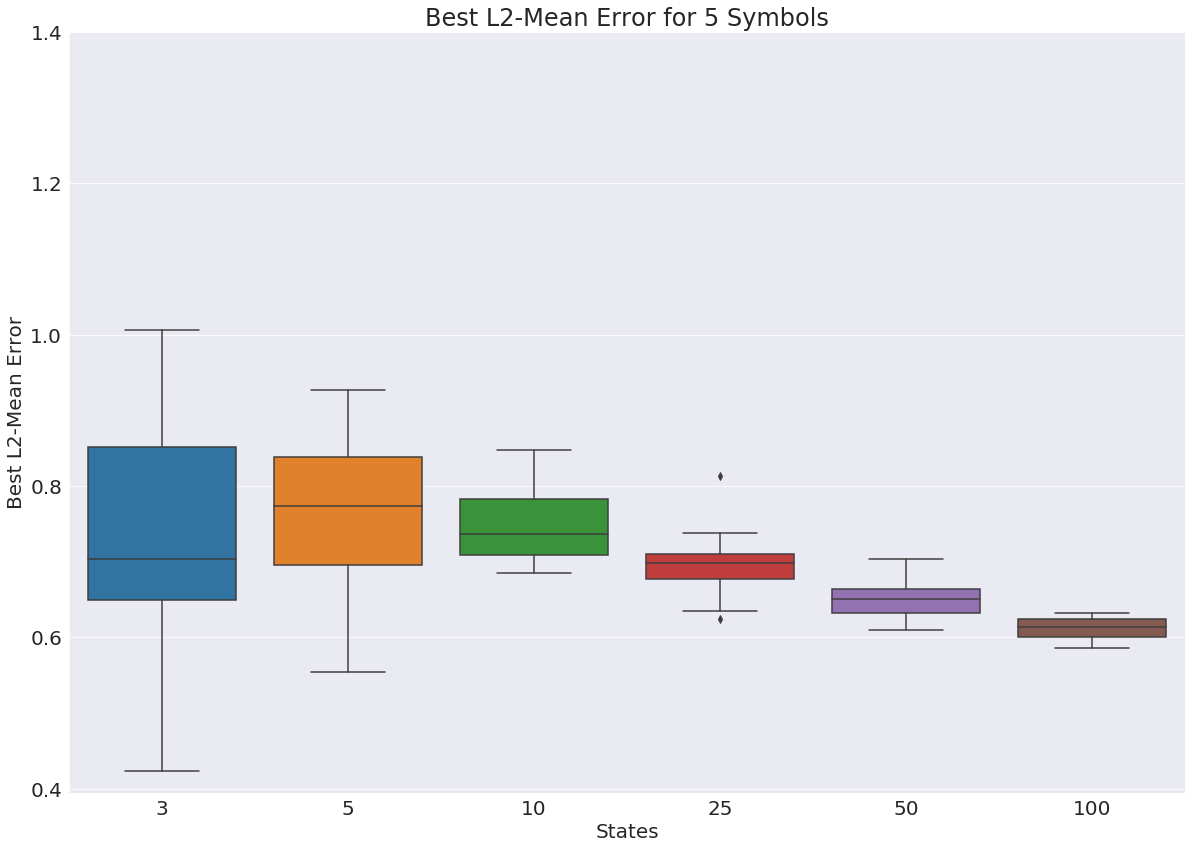

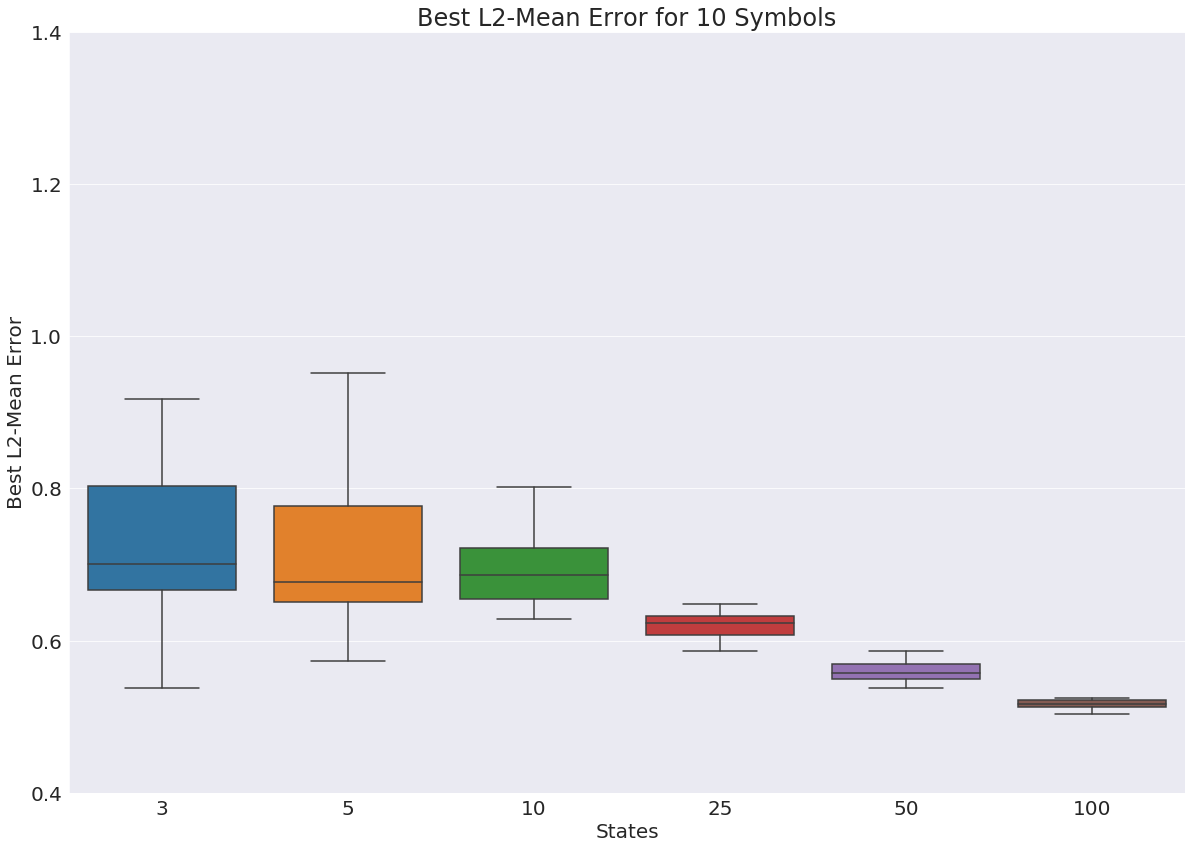

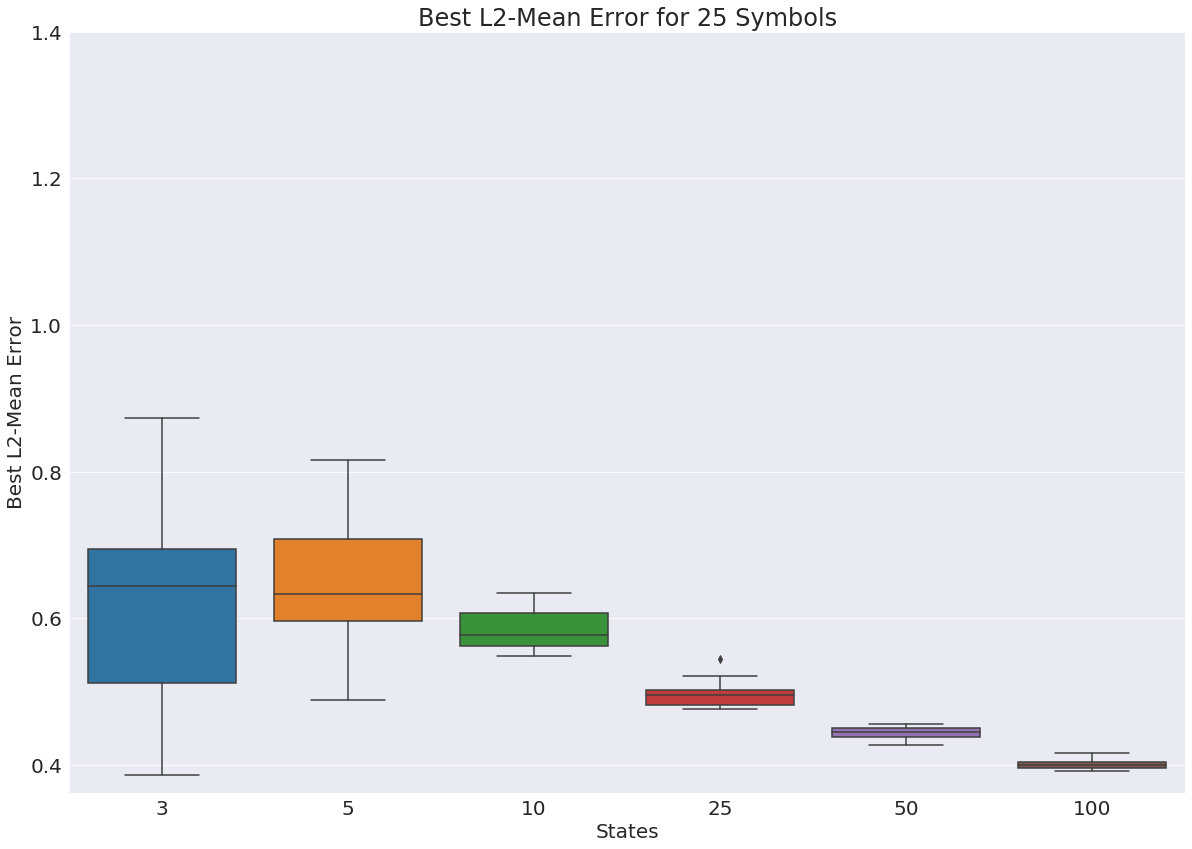

In [12]:
for symbols in [3, 5, 10, 25]:
    plt.figure(figsize=(20, 14))

    ax = sns.boxplot(
        x="states",
        y="loss_scaled",
        data=data[(data["model"] == "best_l2") & (data["symbols"] == symbols)],
    )
    _ = ax.set(
        title=f"Best L2-Mean Error for {symbols} Symbols",
        xlabel="States",
        ylabel="Best L2-Mean Error",
        yticks=np.arange(0.4, 1.5, 0.2),
    )

# Further CNN Models Comparison

## Pre-Training Only

In [13]:
exp_data = []

for fp in glob.glob("./experiments/discriminators_3/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))

exp_data = sorted(
    exp_data,
    key=lambda k: k["model"],
)

In [14]:
data = []

for exp in exp_data:
    for run in range(20):
        for epoch in range(20):
            data.append({
                "model": exp["model"],
                "run": run,
                "epoch": epoch,
                "accuracy": exp["acc_histories"][run][epoch],
                "loss": exp["loss_histories"][run][epoch],
            })
    
data = pd.DataFrame(data)

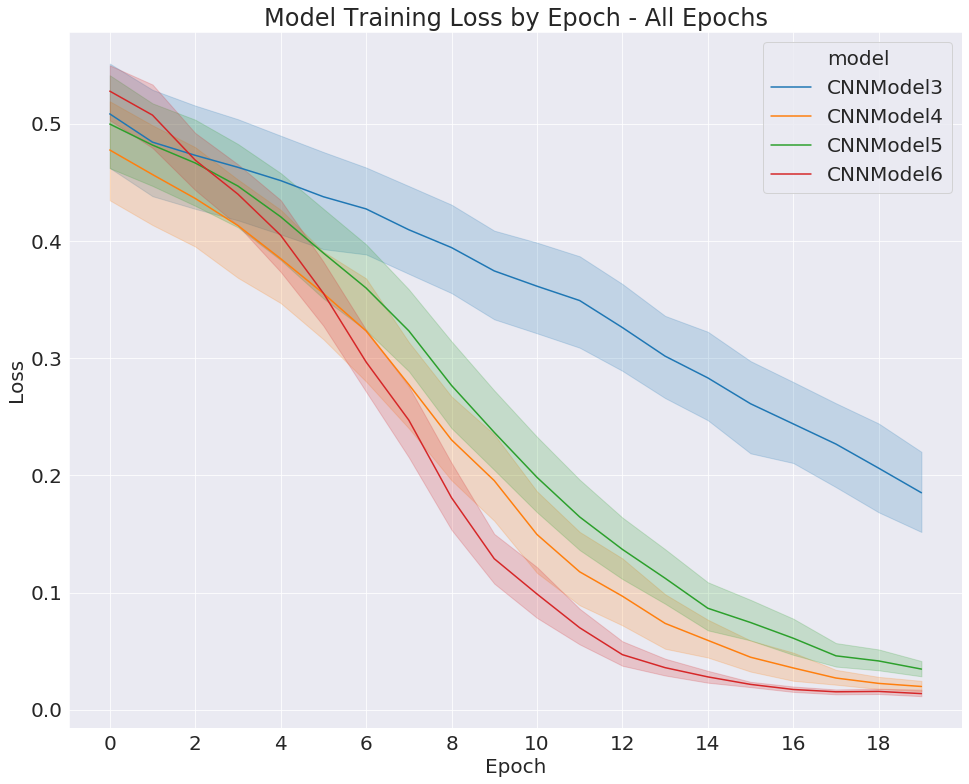

In [15]:
plt.figure(figsize=(16, 12.8))
ax = sns.lineplot(
    x="epoch",
    y="loss",
    hue="model",
    data=data
)
_ = ax.set(
    title="Model Training Loss by Epoch - All Epochs",
    xlabel="Epoch",
    xticks=list(range(0, 20, 2)),
    ylabel="Loss",
)

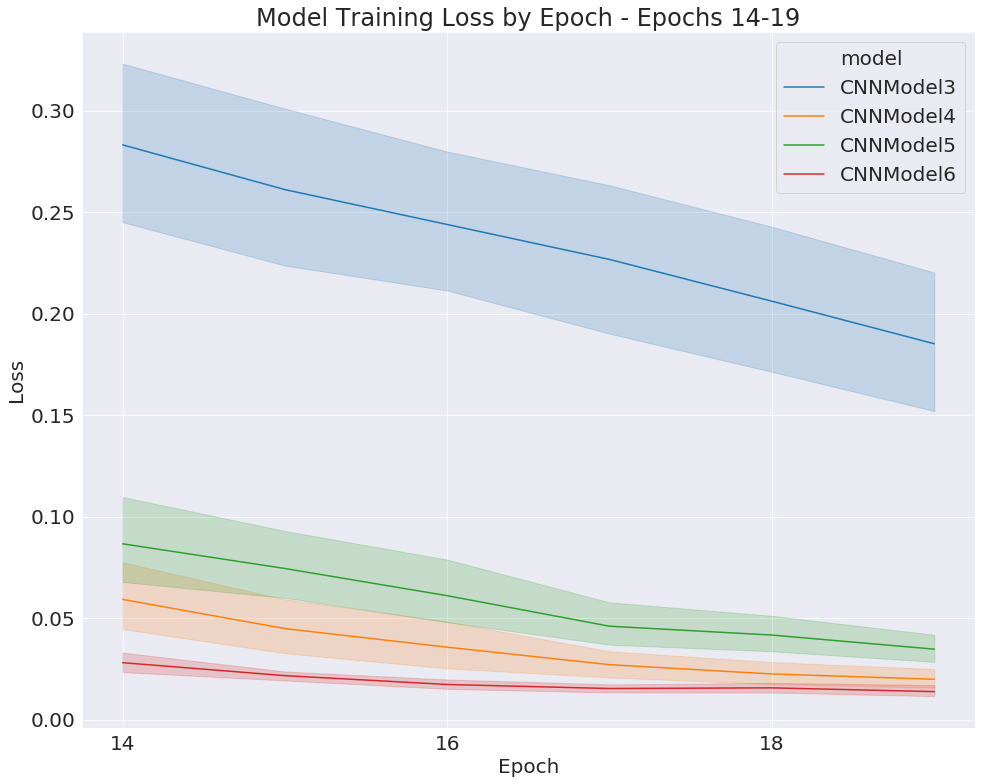

In [16]:
plt.figure(figsize=(16, 12.8))
ax = sns.lineplot(
    x="epoch",
    y="loss",
    hue="model",
    data=data[data["epoch"] >= 14],
)
_ = ax.set(
    title="Model Training Loss by Epoch - Epochs 14-19",
    xlabel="Epoch",
    xticks=list(range(14, 20, 2)),
    ylabel="Loss",
)

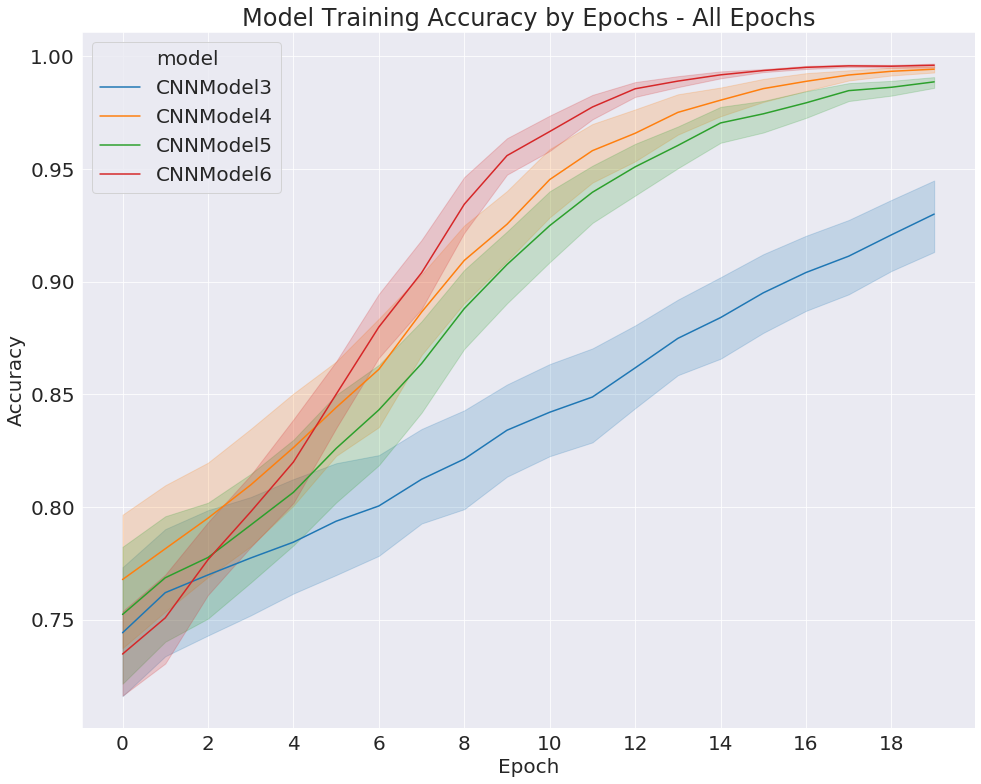

In [17]:
plt.figure(figsize=(16, 12.8))
ax = sns.lineplot(
    x="epoch",
    y="accuracy",
    hue="model",
    data=data
)
_ = ax.set(
    title="Model Training Accuracy by Epochs - All Epochs",
    xlabel="Epoch",
    xticks=list(range(0, 20, 2)),
    ylabel="Accuracy"
)

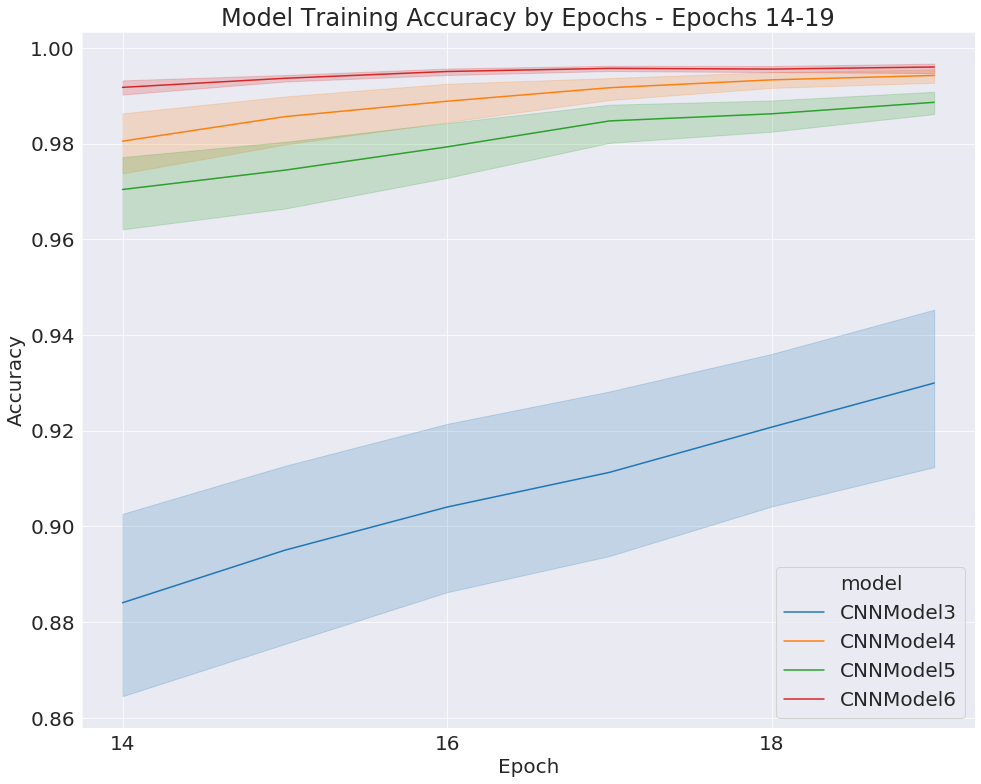

In [18]:
plt.figure(figsize=(16, 12.8))
ax = sns.lineplot(
    x="epoch",
    y="accuracy",
    hue="model",
    data=data[data["epoch"] >= 14],
)
_ = ax.set(
    title="Model Training Accuracy by Epochs - Epochs 14-19",
    xlabel="Epoch",
    xticks=list(range(14, 20, 2)),
    ylabel="Accuracy"
)

## Full Algorithm

In [19]:
exp_data = []

for fp in glob.glob("./experiments/discriminators_4/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))

exp_data = sorted(
    exp_data,
    key=lambda k: k["params"]["model"],
)

In [20]:
data = []

for exp in exp_data:
    for run in range(20):
        data.append({
            "model": exp["params"]["model"],
            "run": run,
            "best_l2": exp["best_l2s"][run],
            "rand_search_l2": exp["rs_l2s"][run],
            "rand_l2": exp["rand_l2s"][run],
        })
    
data = pd.DataFrame(data)

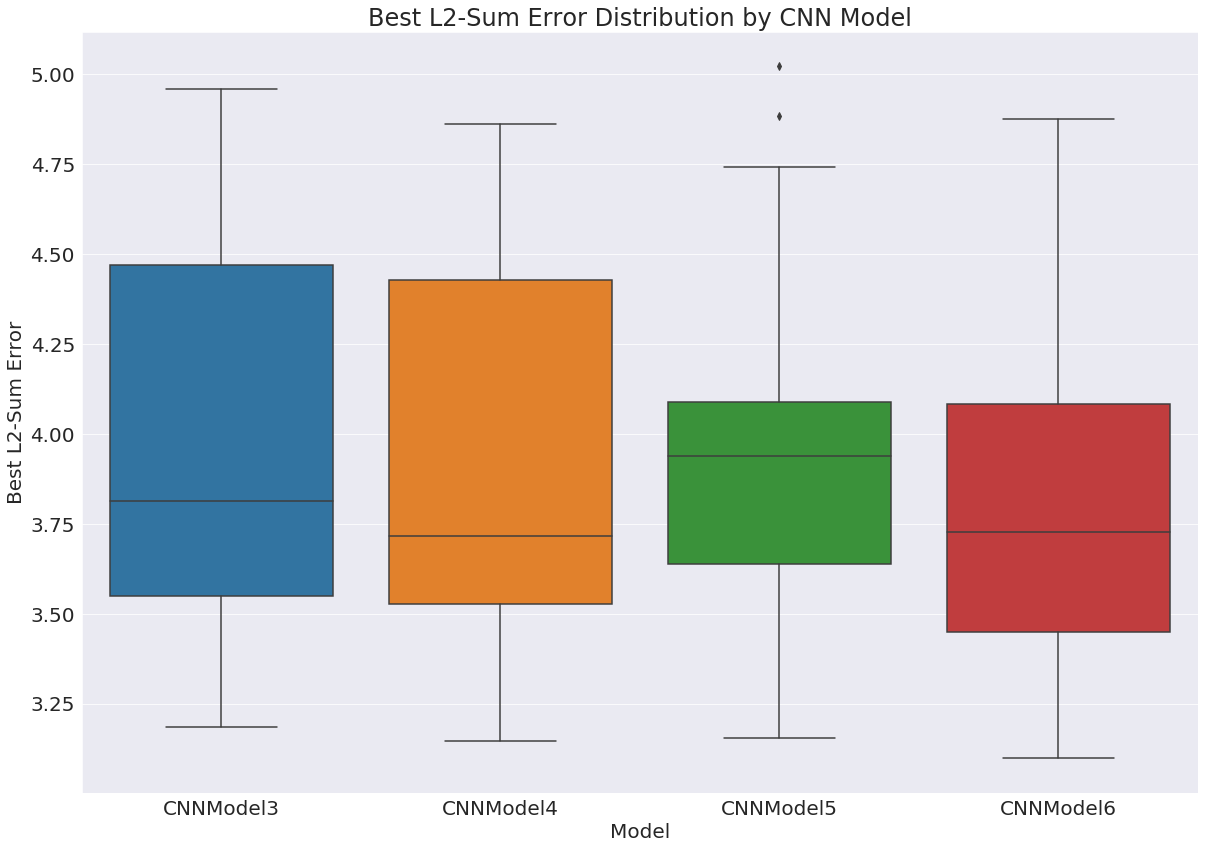

In [21]:
plt.figure(figsize=(20, 14))

ax = sns.boxplot(
    x="model",
    y="best_l2",
    data=data,
)
_ = ax.set(
    title="Best L2-Sum Error Distribution by CNN Model",
    xlabel="Model",
    ylabel="Best L2-Sum Error",
)

In [22]:
cnn3_best_l2s = data[data["model"] == "CNNModel3"]["best_l2"]
cnn4_best_l2s = data[data["model"] == "CNNModel4"]["best_l2"]
cnn5_best_l2s = data[data["model"] == "CNNModel5"]["best_l2"]
cnn6_best_l2s = data[data["model"] == "CNNModel6"]["best_l2"]

# P-Value of CNN4 vs CNN3
s, p = scipy.stats.wilcoxon(cnn4_best_l2s, cnn3_best_l2s, alternative="less")
print(f"CNN4 < CNN3 p-value: {p:.4} (4 s.f.)")

# P-Value of CNN5 vs CNN3
s, p = scipy.stats.wilcoxon(cnn5_best_l2s, cnn3_best_l2s, alternative="less")
print(f"CNN5 < CNN3 p-value: {p:.4} (4 s.f.)")

# P-Value of CNN6 vs CNN3
s, p = scipy.stats.wilcoxon(cnn6_best_l2s, cnn3_best_l2s, alternative="less")
print(f"CNN6 < CNN3 p-value: {p:.4} (4 s.f.)")

# P Value of CNN4 vs CNN5
s, p = scipy.stats.wilcoxon(cnn4_best_l2s, cnn5_best_l2s, alternative="less")
print(f"CNN4 < CNN5 p-value: {p:.4} (4 s.f.)")

# P Value of CNN6 vs CNN4
s, p = scipy.stats.wilcoxon(cnn6_best_l2s, cnn4_best_l2s, alternative="less")
print(f"CNN6 < CNN4 p-value: {p:.4} (4 s.f.)")

CNN4 < CNN3 p-value: 0.2877 (4 s.f.)
CNN5 < CNN3 p-value: 0.5886 (4 s.f.)
CNN6 < CNN3 p-value: 0.1753 (4 s.f.)
CNN4 < CNN5 p-value: 0.3137 (4 s.f.)
CNN6 < CNN4 p-value: 0.2751 (4 s.f.)
